<a href="https://colab.research.google.com/github/alexDx12/gb_statistics/blob/lesson_3/lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Теория вероятностей и математическая статистика

## Урок 3

## Основы математической статистики. Количественные характеристики популяции. Графическое представление данных

### Домашнее задание

В поле ответа впишите одно число. Нецелые числа следует округлить до 8 знаков после запятой.

### Задача 1

__Постановка задачи__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.

__Решение__

Список с выборкой (sample):

In [ ]:
sample = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

Выборочное среднее (mean):

In [ ]:
mean = sum(sample) / len (sample)
mean

73.14285714285714

Выборочная (несмещённая) дисперсия (variance):

In [ ]:
variance = sum([(value - mean) ** 2 for value in sample]) / (len(sample) - 1)
variance

2241.8285714285716

Выборочное (несмещённое) стандартное отклонение (std):

In [ ]:
std = variance ** 0.5
round(std, 8)

47.34795214

Ответ: 47.34795214.

### Задача 2

__Постановка задачи__

Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении "усов" в `boxplot`, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.

__Решение__

Импорт библиотек и скриптов:

In [ ]:
import seaborn as sns

Вспомогательные классы и функции:

In [ ]:
def quantile(l: list, order: float) -> float:
    """Квантиль порядка `order` по списку `l`.
    """
    
    l = sorted(l)
    n = len(l)
    
    n_left_elements = int(n * order)
    n_right_elements = int(n * (1 - order))
    
    print(f"Общее количество элементов: {n}, количество элементов слева: {n_left_elements}, количество элементов справа: {n_right_elements}.")
    
    if n_left_elements + n_right_elements == n:
        return (l[n_left_elements - 1] + l[n_left_elements]) / 2
    
    else:
        assert n_left_elements + n_right_elements == n - 1
        
        return l[n_left_elements]

Список с выборкой (sample):

In [ ]:
sample = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

Первый квантиль (q1):

In [ ]:
q1 = quantile(sample, 0.25)
q1

Общее количество элементов: 21, количество элементов слева: 5, количество элементов справа: 15.


45

Третий квантиль (q3):

In [ ]:
q3 = quantile(sample, 0.75)
q3

Общее количество элементов: 21, количество элементов слева: 15, количество элементов справа: 5.


84

Интерквартильный размах (iqd):

In [ ]:
iqd = q3 - q1
iqd

39

Диапазон значений, за пределами которого значения выборки считаются выбросами по методике построения "усов" в boxplot (boxplot_range):

In [ ]:
boxplot_range = [q1 - 1.5 * iqd, q3 + 1.5 * iqd]
boxplot_range

[-13.5, 142.5]

Список значений с выбросами (outliers):

In [ ]:
outliers = [item for item in sample if item < min(boxplot_range) or item > max(boxplot_range)]
outliers

[230, 150]

Число выбросов:

In [ ]:
 len(outliers)

2

Построение диаграммы boxplot:

In [ ]:
%config InlineBackend.figure_formats = ['svg']

<AxesSubplot:>

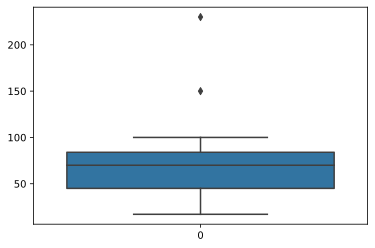

In [ ]:
sns.boxplot(data=sample)

Ответ: 2.

### Задача 3

__Постановка задачи__

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

_Замечание_: да, эта задача не на тему статистики, но тема важная, и её стоит иногда освежать в памяти.

__Решение__

Пусть $A$, $B$, $C$ — события, заключающиеся в том, что случайным образом взятый студент учится, соответственно, на факультете $A$, $B$ или $C$. Кроме того, пусть событие $S$ обозначает, что случайным образом взятый студент сдал первую сессию. Для решения задачи нам нужно посчитать условные вероятности
$$P(A|S), \: P(B|S), \: P(C|S)$$
и выбрать тот факультет, которому соответствует наибольшая вероятность. Данные вероятности можно посчитать с помощью формулы Байеса. Например, для факультета $A$:
$$P(A | S) = \dfrac{P(S | A) \cdot P(A)}{P(S)}$$

Количество студентов на факультетах $A$, $B$ и $C$ соотвественно (n_a, n_b, n_c): 

In [ ]:
n_a = 100
n_b = 90
n_c = 45

Суммарное количество студентов на факультетах $A$, $B$ и $C$ (n_abc):

In [ ]:
n_abc = n_a + n_b + n_c
n_abc

235

Вероятности того, что студент сдаст первую сессию для факультетов $A$, $B$ и $C$ соответственно (p_a, p_b, p_c):

In [ ]:
p_sa = 0.6
p_sb = 0.7
p_sc = 0.8

Вероятности того, что выбранный студент относится к факультету $A$, $B$ и $C$ соответственно (p_a, p_b, p_c):

In [ ]:
p_a = n_a / n_abc
p_b = n_b / n_abc
p_c = n_c / n_abc
p_a, p_b, p_c

(0.425531914893617, 0.3829787234042553, 0.19148936170212766)

Вероятность сдачи первой сессии студентом (p_s):

In [ ]:
p_s = p_sa*p_a + p_sb*p_b + p_sc*p_c
p_s

0.676595744680851

Условные вероятности $P(A|S), \: P(B|S) \: и \: P(C|S)$ соотвественно (p_as, p_bs, p_cs):

In [ ]:
p_as = p_sa * p_a / p_s
p_bs = p_sb * p_b / p_s
p_cs = p_sc * p_c / p_s
p_as, p_bs, p_cs

(0.3773584905660377, 0.39622641509433965, 0.22641509433962265)

Наиболее вероятное событие:

In [ ]:
max(p_as, p_bs, p_cs)

0.39622641509433965

Ответ: 2.